# Projet Python Avancé - MOSEF

### On importe les packages nécessaires dans la suite du code

In [98]:
# Import des packages
import pandas as pd
import requests
from lxml import html
from unidecode import unidecode
from bs4 import BeautifulSoup
import urllib
import re
import matplotlib.pyplot as plt
import numpy as np

### Etape 1 : Récupération des informations du site pour construire un dataframe

In [2]:
url_site = """https://www.pimkie.fr/c-toute-la-collection"""

Nous avons choisi ce site de vêtements de femmes. Durant cette première partie, nous allons récolter diverses informations comme les catégories, sous-catégories, nombre de produits, prix des produits, etc ... Pour cela, nous allons créer diverses fonctions.

#### 1) Récupération des catégories

In [3]:
def recup_categorie(url):
    """
    Cette fonction, appliquée à l'accueil du site, permet de récupérer les grandes catégories des produits vendus.
    """
    # Ouvrir l'URL
    soup = BeautifulSoup(urllib.request.urlopen(url))
    # Stockage des informations
    Categorie = []
    Categorie_url = []
    Nb_Art_Categorie = []
    for a in soup.find_all('li', class_="category-element"): 
        p = re.compile('title="(.[^#<#\n]+)"',re.IGNORECASE) # Récupérer les noms des catégories
        match = p.findall(str(a))
        if (match != [] and match[0] not in Categorie):
            Categorie.append(match[0])
        p = re.compile('href="(.[^#"#\n]+)"',re.IGNORECASE) # Récupérer les url des pages des catégories
        match = p.findall(str(a))
        if (match != [] and match[0] not in Categorie_url):
            Categorie_url.append(match[0])
        p = re.compile('[0-9]+',re.IGNORECASE) # Récupérer les nombres
        match = p.findall(str(a))
        if match != []:
            Nb_Art_Categorie.append(int(match[0]))
    Nb_Art_Categorie = Nb_Art_Categorie[0:len(Categorie)]
    return(Categorie, Categorie_url, Nb_Art_Categorie)

In [4]:
# Appel de la fonction
Categorie, Categorie_url, Nb_Art_Categorie = recup_categorie(url_site)

In [5]:
# Vérification des résultats
print(Categorie)
print("##################################")
print(Categorie_url)
print("##################################")
print(Nb_Art_Categorie)

['Manteau', 'Veste', 'Pull et gilet', 'Jean', 'Blouse et chemise', 'Pantalon', 'Tshirt et top', 'Robe', 'Jupe', 'Sweat', 'Combinaison', 'body', 'Short', 'Toute la collection']
##################################
['https://www.pimkie.fr/c-manteau', 'https://www.pimkie.fr/c-veste', 'https://www.pimkie.fr/c-pull-et-gilet', 'https://www.pimkie.fr/c-jean', 'https://www.pimkie.fr/c-blouse-et-chemise', 'https://www.pimkie.fr/c-pantalon', 'https://www.pimkie.fr/c-tshirt-et-top', 'https://www.pimkie.fr/c-robe', 'https://www.pimkie.fr/c-jupe', 'https://www.pimkie.fr/c-sweat', 'https://www.pimkie.fr/c-combinaison', 'https://www.pimkie.fr/c-body', 'https://www.pimkie.fr/c-short', 'https://www.pimkie.fr/c-toute-la-collection']
##################################
[37, 43, 107, 48, 61, 25, 142, 37, 39, 5, 1, 2, 13, 730]


In [6]:
# La catégorie "Toute la collection" ne sera pas utile dans la suite
nb_categorie = len(Categorie)
Categorie = Categorie[0:nb_categorie - 1]
Categorie_url = Categorie_url[0:nb_categorie - 1]
Nb_Art_Categorie = Nb_Art_Categorie[0:nb_categorie - 1]

Le nombre d'articles par catégorie permet de vérifier la bonne récupération des informations, cela ne sera pas stocké dans le dataframe par la suite. En revanche, il peut être intéressant de connaître la catégorie de chaque article et les url vont nous permettre de naviguer entre les pages.

#### 2) Création du dataframe vide

In [7]:
df = pd.DataFrame(columns=['Nom','URL', 'Prix', 'Couleur', 'Sous_Catégorie', 'Catégorie','Catégorie_url'])

In [8]:
df.head()

,Nom,URL,Prix,Couleur,Sous_Catégorie,Catégorie,Catégorie_url


#### 3) Récupération des premières informations des produits

In [9]:
def recup_sous_categorie(url, df, categorie):
    """
    Cette fonction, appliquée aux pages des catégories, permet de récupérer la liste des produits vendus.
    """
    # Ouvrir l'URL
    soup = BeautifulSoup(urllib.request.urlopen(url))
    for a in soup.find_all('div',class_="product-name"): # Classe détaillant les produits présentés
        p = re.compile('title="(.[^#<#\n]+)"',re.IGNORECASE) # Récupérer les noms des produits
        match = p.findall(str(a))
        if (match != []): # On a trouvé un produit
            n = len(df)
            df.loc[n, 'Catégorie'] = categorie # On entre les informations relatives à sa catégorie
            df.loc[n, 'Catégorie_url'] = url
            df.loc[n, 'Nom'] = match[0] # On entre son nom
        p = re.compile('href="(.[^#<#\n]+)"\s',re.IGNORECASE) # Récupérer les url des produits 
        match = p.findall(str(a))
        if (match != []):
            df.loc[n, 'URL'] = match[0] # On les mémorise dans le dataframe
    return(df)

In [10]:
# Appel de la fonction
for i in range(len(Categorie_url)):
    df = recup_sous_categorie(Categorie_url[i], df, Categorie[i])

In [11]:
# Vérification des résultats
df.head(40)

,Nom,URL,Prix,Couleur,Sous_Catégorie,Catégorie,Catégorie_url
0,Parka à capuche,https://www.pimkie.fr/p/parka-a-capuche-280247...,NaN,NaN,NaN,Manteau,https://www.pimkie.fr/c-manteau
1,Parka imperméable,https://www.pimkie.fr/p/parka-impermeable-2802...,NaN,NaN,NaN,Manteau,https://www.pimkie.fr/c-manteau
2,Doudoune à capuche,https://www.pimkie.fr/p/doudoune-a-capuche-280...,NaN,NaN,NaN,Manteau,https://www.pimkie.fr/c-manteau
3,Manteau long avec laine,https://www.pimkie.fr/p/manteau-long-avec-lain...,NaN,NaN,NaN,Manteau,https://www.pimkie.fr/c-manteau
4,Manteau long avec laine,https://www.pimkie.fr/p/manteau-long-avec-lain...,NaN,NaN,NaN,Manteau,https://www.pimkie.fr/c-manteau
5,Trench avec ceinture,https://www.pimkie.fr/p/trench-avec-ceinture-2...,NaN,NaN,NaN,Manteau,https://www.pimkie.fr/c-manteau
6,Manteau en fausse fourrure,https://www.pimkie.fr/p/manteau-en-fausse-four...,NaN,NaN,NaN,Manteau,https://www.pimkie.fr/c-manteau
7,Manteau à capuche,https://www.pimkie.fr/p/manteau-a-capuche-2802...,NaN,NaN,NaN,Manteau,https://www.pimkie.fr/c-manteau
8,Doudoune légère,https://www.pimkie.fr/p/doudoune-legere-280241...,NaN,NaN,NaN,Manteau,https://www.pimkie.fr/c-manteau
9,Trench suédine,https://www.pimkie.fr/p/trench-suedine-280248C...,NaN,NaN,NaN,Manteau,https://www.pimkie.fr/c-manteau


On a maintenant les informations générales des produits disponibles sur le site. On va, par la suite, tenter d'obtenir les informations détaillées de chaque produit.

#### 4) Informations détaillées

Pour cela, nous allons parcourir les url de chaque produit pour terminer de remplir notre base.

In [12]:
def sous_categorie(i, df):
    """
    Cette fonction, appliquée à l'url du produit, permet de récupérer sa sous-catégorie
    """
    # On cherche la sous-catégorie du produit
    soup = BeautifulSoup(urllib.request.urlopen(df.loc[i, 'URL']))
    a = soup.find('a',class_="refinement-link active") # On ne veut que le premier match
    p = re.compile('title="(.[^#<#\n]+)"',re.IGNORECASE) # Récupérer les sous-cat
    match = p.findall(str(a))
    if (match != []): # On a trouvé un produit
        df.loc[i, 'Sous_Catégorie'] = match[0]
    return df

In [13]:
for i in range(len(df)):
    df = sous_categorie(i,df)

In [14]:
df.head(40)

,Nom,URL,Prix,Couleur,Sous_Catégorie,Catégorie,Catégorie_url
0,Parka à capuche,https://www.pimkie.fr/p/parka-a-capuche-280247...,NaN,NaN,parka,Manteau,https://www.pimkie.fr/c-manteau
1,Parka imperméable,https://www.pimkie.fr/p/parka-impermeable-2802...,NaN,NaN,parka,Manteau,https://www.pimkie.fr/c-manteau
2,Doudoune à capuche,https://www.pimkie.fr/p/doudoune-a-capuche-280...,NaN,NaN,doudoune,Manteau,https://www.pimkie.fr/c-manteau
3,Manteau long avec laine,https://www.pimkie.fr/p/manteau-long-avec-lain...,NaN,NaN,manteau long,Manteau,https://www.pimkie.fr/c-manteau
4,Manteau long avec laine,https://www.pimkie.fr/p/manteau-long-avec-lain...,NaN,NaN,manteau long,Manteau,https://www.pimkie.fr/c-manteau
5,Trench avec ceinture,https://www.pimkie.fr/p/trench-avec-ceinture-2...,NaN,NaN,trench,Manteau,https://www.pimkie.fr/c-manteau
6,Manteau en fausse fourrure,https://www.pimkie.fr/p/manteau-en-fausse-four...,NaN,NaN,Fausse fourrure,Manteau,https://www.pimkie.fr/c-manteau
7,Manteau à capuche,https://www.pimkie.fr/p/manteau-a-capuche-2802...,NaN,NaN,manteau long,Manteau,https://www.pimkie.fr/c-manteau
8,Doudoune légère,https://www.pimkie.fr/p/doudoune-legere-280241...,NaN,NaN,doudoune,Manteau,https://www.pimkie.fr/c-manteau
9,Trench suédine,https://www.pimkie.fr/p/trench-suedine-280248C...,NaN,NaN,trench,Manteau,https://www.pimkie.fr/c-manteau


In [73]:
def autre_info(i, df):
    """
    Cette fonction, appliquée à l'url du produit, permet de récupérer les informations relatives au produit
    """
    # On cherche la sous-catégorie du produit
    soup = BeautifulSoup(urllib.request.urlopen(df.loc[i, 'URL']))
    # Récupération de la couleur
    a = soup.find('span',class_="text-color-uni") # On ne veut que le premier match
    p = re.compile('>(.[^#<#\n]+)<',re.IGNORECASE) # Récupérer les sous-cat
    match = p.findall(str(a))
    if (match != []): # On a trouvé un produit
        df.loc[i, 'Couleur'] = match[0]
    else:
        a = soup.find('img',class_="lazyload") # On ne veut que le premier match
        p = re.compile(df.loc[i, 'Nom'] + " " +'([a-zA-Z]+)',re.IGNORECASE) # Récupérer les sous-cat
        match = p.findall(str(a))
        if (match != []): # On a trouvé un produit
            df.loc[i, 'Couleur'] = match[0]
    # Récupération du prix
    a = soup.find('span',class_="plain") # On ne veut que le premier match
    p = re.compile('>(.[^#<#\n]+)<',re.IGNORECASE) # Récupérer les sous-cat
    match = p.findall(str(a))
    if (match != []): # On a trouvé un produit
        df.loc[i, 'Prix'] = int(match[0])
    return df

In [74]:
for i in range(len(df)):
    df = autre_info(i,df)

In [75]:
df.head(40)

,Nom,URL,Prix,Couleur,Sous_Catégorie,Catégorie,Catégorie_url
0,Parka à capuche,https://www.pimkie.fr/p/parka-a-capuche-280247...,49,kaki,parka,Manteau,https://www.pimkie.fr/c-manteau
1,Parka imperméable,https://www.pimkie.fr/p/parka-impermeable-2802...,69,noir,parka,Manteau,https://www.pimkie.fr/c-manteau
2,Doudoune à capuche,https://www.pimkie.fr/p/doudoune-a-capuche-280...,65,noir,doudoune,Manteau,https://www.pimkie.fr/c-manteau
3,Manteau long avec laine,https://www.pimkie.fr/p/manteau-long-avec-lain...,69,kaki,manteau long,Manteau,https://www.pimkie.fr/c-manteau
4,Manteau long avec laine,https://www.pimkie.fr/p/manteau-long-avec-lain...,69,caramel,manteau long,Manteau,https://www.pimkie.fr/c-manteau
5,Trench avec ceinture,https://www.pimkie.fr/p/trench-avec-ceinture-2...,29,beige,trench,Manteau,https://www.pimkie.fr/c-manteau
6,Manteau en fausse fourrure,https://www.pimkie.fr/p/manteau-en-fausse-four...,59,blanc,Fausse fourrure,Manteau,https://www.pimkie.fr/c-manteau
7,Manteau à capuche,https://www.pimkie.fr/p/manteau-a-capuche-2802...,55,noir,manteau long,Manteau,https://www.pimkie.fr/c-manteau
8,Doudoune légère,https://www.pimkie.fr/p/doudoune-legere-280241...,29,noir,doudoune,Manteau,https://www.pimkie.fr/c-manteau
9,Trench suédine,https://www.pimkie.fr/p/trench-suedine-280248C...,49,vert,trench,Manteau,https://www.pimkie.fr/c-manteau


### Etape 2 : Analyser les informations récupérées

#### 1) Nombre d'articles par catégorie

In [91]:
df_categorie = df.groupby(by = "Catégorie").count()

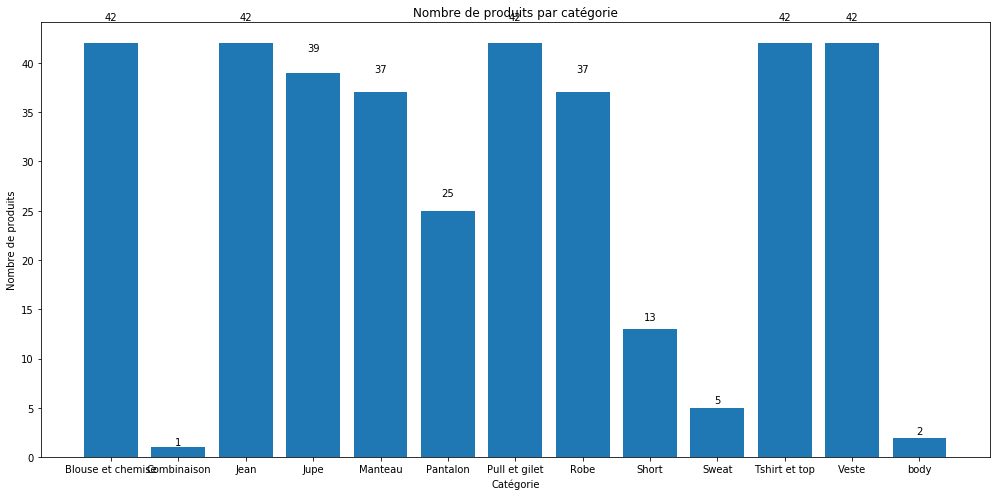

In [112]:
#fig = plt.figure(1, figsize=(15, 13))
fig, ax = plt.subplots(1, figsize=(17, 8))
bar_plot = plt.bar(np.arange(len(df_categorie)), df_categorie.Nom)
plt.xticks(np.arange(len(df_categorie)), df_categorie.index)
bar_label = df_categorie.Nom
for idx,rect in enumerate(bar_plot):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
            bar_label[idx],
                ha='center', va='bottom', rotation=0)
plt.title("Nombre de produits par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de produits")
plt.show()

#### 2) Prix par catégorie

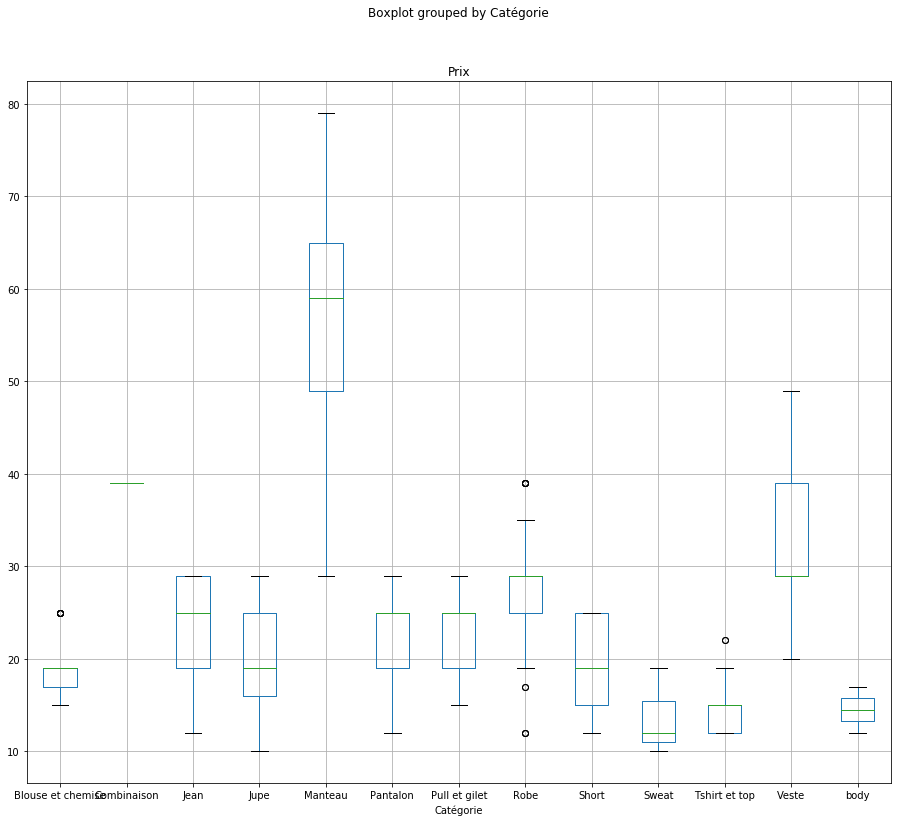

In [124]:
boxplot = df.boxplot(column=['Prix'], by = 'Catégorie', figsize=(15, 13))

In [118]:
test = df.groupby(by = ["Catégorie", "Couleur"]).count()

In [119]:
test

Nom  URL  Prix  Sous_Catégorie  \
Catégorie         Couleur                                           
Blouse et chemise beige              2    2     2               2   
                  blanc              9    9     9               9   
                  blanc cassé        1    1     1               1   
                  bleu               3    3     3               3   
                  bleu ciel          1    1     1               1   
                  camel              1    1     1               1   
                  doré               1    1     1               1   
                  jaune              2    2     2               2   
                  kaki               1    1     1               1   
                  noir              13   13    13              13   
                  orange             1    1     1               1   
                  rose               2    2     2               2   
                  rouge              1    1     1               1   
                  terracotta         2    2     2               2   
                  vert               2    2     2               2   
Combinaison       camel              1    1     1               1   
Jean              bleu              18   18    18              18   
                  bleu brut          1    1     1               1   
                  bleu denim         3    3     3               3   
                  bleu délavé        1    1     1               1   
                  bleu foncé         1    1     1               1   
                  gris               7    7     7               7   
                  noir              10   10    10              10   
                  écru               1    1     1               1   
Jupe              bleu               2    2     2               2   
                  bleu canard        1    1     1               1   
                  bordeaux           1    1     1               1   
                  camel              2    2     2               2   
                  grenat             2    2     2               2   
                  marron             4    4     4               4   
...                                ...  ...   ...             ...   
Tshirt et top     gris anthracite    1    1     1               1   
                  gris foncé         1    1     1               1   
                  gris perle         1    1     1               1   
                  jaune              3    3     2               3   
                  kaki               2    2     2               2   
                  marron             1    1     1               1   
                  noir               8    8     3               8   
                  noir + rouge       1    1     1               1   
                  rouille            1    1     1               1   
                  vert               4    4     2               4   
                  écru               1    1     1               1   
Veste             beige              1    1     1               1   
                  blanc              1    1     1               1   
                  bleu               5    5     5               5   
                  bleu denim         1    1     1               1   
                  camel              3    3     3               3   
                  caramel            2    2     2               2   
                  framboise          1    1     1               1   
                  gris               1    1     1               1   
                  gris argenté       1    1     1               1   
                  gris délavé        1    1     1               1   
                  kaki               1    1     1               1   
                  marron             1    1     1               1   
                  noir              14   14    14              14   
                  prune              1    1     1               1   
                  rose           

A faire : Continuer l'analyse des informations

Amélioration du code : Remplacer les boucles for par des fonctions des dataframe et utiliser pyspark